# Power Plants

* **Data:** `powerplants.csv`
* **Columns of interest:**
    * `Plant_Name` is the name of the power plant
    * `Utility_Na` is the name of the owner of the power plant
    * `City`, `County`, `StateName`, `Zip`
    * `PrimSource` is what kind of energy source it uses (nuclear, coal, etc)
    * `Total_MW` is the total amount of energy produces

## Read in the data

In [224]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)
df = pd.read_csv("powerplants.csv")

In [225]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

## What are the different types of energy sources in this dataset?

In [226]:
df.primsource.value_counts()

solar             2255
natural gas       1701
hydroelectric     1410
wind              1043
petroleum          842
biomass            726
coal               337
other              140
geothermal          66
nuclear             61
pumped storage      35
Name: primsource, dtype: int64

## What is the most common type of power plant in the United States?

In [227]:
df.plant_name.value_counts().sort_values(ascending=False)

Consumer Operations LLC           2
Kelford                           2
Halifax                           2
High Plains                       2
Bear Creek Solar                  2
                                 ..
Cougar Solar, LLC                 1
Creston Ridge II, LLC             1
RJC II Community Solar Garden     1
Betcher Community Solar Garden    1
NCSU Cates Cogeneration Plant     1
Name: plant_name, Length: 8606, dtype: int64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:>

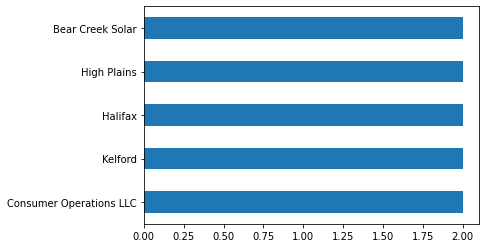

In [228]:
df.plant_name.value_counts().sort_values(ascending=False).head().plot(kind='barh')

# df.primsource.value_counts().sort_values().plot(kind='barh')

## What type of power plant produces the most energy in the United States?

In [232]:
df.groupby(by='primsource').total_mw.size().sort_values(ascending=False).head()

primsource
solar            2255
natural gas      1701
hydroelectric    1410
wind             1043
petroleum         842
Name: total_mw, dtype: int64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:ylabel='primsource'>

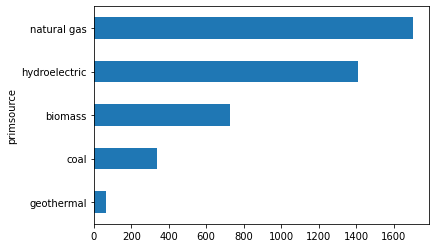

In [230]:
df.groupby(by='primsource').total_mw.size().head().sort_values().plot(kind='barh')

## What US state has the most power plants?

In [231]:
df.statename.value_counts().sort_values(ascending=False).head()

California        1344
North Carolina     626
Texas              431
New York           407
Minnesota          366
Name: statename, dtype: int64

## What three US states produce the most energy?

In [129]:
df.groupby('statename').total_mw.size().head().sort_values(ascending=False).head(3)

statename
California    1344
Alaska         145
Arizona        129
Name: total_mw, dtype: int64

In [130]:
# df.groupby('statename').total_mw.size() \
#     .groupby(level=0, group_keys=False) \
#     .nlargest(3)

## What state has the most coal power plants?

In [136]:
coal = df[df.primsource == 'coal']

coal.statename.value_counts().sort_values(ascending=False).head()

Illinois        21
Pennsylvania    21
Texas           18
Indiana         17
Iowa            15
Name: statename, dtype: int64

## What state produces the most energy using solar power?

In [172]:
solar = df[df.primsource == 'solar']
# statename.sort_values(ascending=False).head()


## List all of the nuclear powerplants in New York.

In [234]:
df[(df.statename == 'New York') & (df.primsource == 'nuclear')]
                                  

# # df[df.agency == 'NYPD'].groupby('complaint_type') \
# #     .time_to_fix.median().sort_values()

,plant_code,plant_name,utility_na,utility_id,sector_nam,city,county,statename,zip,street_add,primsource,install_mw,total_mw,coal_mw,ng_mw,crude_mw,bio_mw,hydro_mw,hydrops_mw,nuclear_mw,solar_mw,wind_mw,geo_mw,other_mw,source_des,tech_desc,source,period,latitude,longitude
1155,2497,Indian Point 2,Entergy Nuclear Indian Point 2,6027,IPP Non-CHP,Buchanan,Westchester,New York,10511,Broadway & Bleakley Ave,nuclear,"1,299.0","1,000.4",0.0,0.0,0.0,NaN,0.0,0.0,"1,000.4",0.0,0.0,NaN,0.0,Nuclear = 1000.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,41.270556,-73.9527
1213,2589,Nine Mile Point Nuclear Station,Exelon Nuclear,55951,IPP Non-CHP,Lycoming,Oswego,New York,13093,PO Box 63,nuclear,"1,901.1","1,916.0",0.0,0.0,0.0,NaN,0.0,0.0,"1,916.0",0.0,0.0,NaN,0.0,Nuclear = 1916 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,43.5211,-76.41
1861,6110,James A Fitzpatrick,Exelon Nuclear,55951,IPP Non-CHP,Lycoming,Oswego,New York,13093,Lake Road,nuclear,883.3,851.0,0.0,0.0,0.0,NaN,0.0,0.0,851.0,0.0,0.0,NaN,0.0,Nuclear = 851 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,43.52139,-76.408394
1868,6122,R E Ginna Nuclear Power Plant,Exelon Nuclear,55951,IPP Non-CHP,Ontario,Wayne,New York,14519,Lake Rd.,nuclear,614.0,582.0,0.0,0.0,0.0,NaN,0.0,0.0,582.0,0.0,0.0,NaN,0.0,Nuclear = 582 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,43.2777,-77.3099
2536,8907,Indian Point 3,Entergy Nuclear Indian Point 3,6028,IPP Non-CHP,Buchanan,Westchester,New York,10511,Broadway Bleakley Avenue,nuclear,"1,012.0","1,041.3",0.0,0.0,0.0,NaN,0.0,0.0,"1,041.3",0.0,0.0,NaN,0.0,Nuclear = 1041.3 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,41.2706,-73.9526


In [233]:
# 

## What is the most common type of powerplant in New Jersey?

In [240]:
nj_power = df[df.statename == 'New Jersey']
nj_power.primsource.value_counts().head()

solar          183
natural gas     48
biomass         16
petroleum        4
nuclear          3
Name: primsource, dtype: int64

## What type of power plant produces the most power in New Jersey?